# Домашнее задание №3

In [41]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from pylab import rcParams

%matplotlib inline

## Part 1

Таблица Indian liver pations records.

In [42]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [44]:
#Есть пропущенные значение в таблице - убираем
data = data.dropna()

### Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

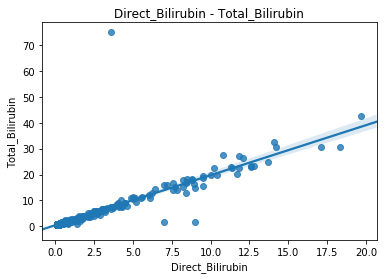

In [45]:
#Graph
direct = data['Direct_Bilirubin']
total = data['Total_Bilirubin']
sns.regplot(x=direct, y=total, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Direct_Bilirubin - Total_Bilirubin')
plt.show()

Видно, что параметры сильно связаны

In [46]:
#Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(np.array(direct).reshape(-1, 1), total)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.4263057597486335
slope: [1.93361341]


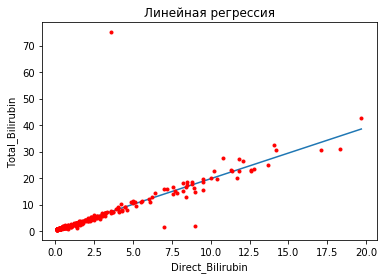

In [47]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(direct), max(direct), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(direct, total, 'r.')
plt.show()

In [48]:
#Prediction
prediction = model.predict(np.array(direct[5]).reshape(-1,1))
real = total[5]
print(f'Predicted - {prediction}')
print(f'Real - {real}')

Predicted - [1.77983515]
Real - 1.8


In [49]:
#Handmade))
print(f'Handmade result - {model.coef_*direct[5] + model.intercept_}')

Handmade result - [1.77983515]


In [50]:
prediction = model.predict(np.array(direct[34]).reshape(-1,1))
real = total[34]
print(f'Predicted - {prediction}')
print(f'Real - {real}')

Predicted - [2.74664186]
Real - 2.6


### Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

### Большая часть тескта ниже - мысли вслух

Сильнее всего положительный результат (кстати - это 1 или 2?) зависит от Direct_bilirubin. Следующие по значимости несколько параметров также относительно хорошо коррелируют с билирубином. Поэтому вторым параметром выберем возраст - корреляция с первым параметром практически отсутсвует.

In [51]:
age = data['Age']
direct = data['Direct_Bilirubin']
dataset = data['Dataset']
X = np.vstack([np.array(age), np.array(direct)]).T
y = dataset

model = LinearRegression()
result = model.fit(X, y)

In [52]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.5077946384951577
slope: [-0.00366237 -0.03936135]


In [53]:
print(model.predict(X[10:20]))
print(y[10:20])
# X[3,:].reshape(-1,1)

[1.29510341 1.19293424 1.26159455 1.22103472 1.2765178  1.41229925
 1.3371355  1.36725575 1.34949143 1.34949143]
10    1
11    1
12    2
13    1
14    1
15    2
16    1
17    2
18    1
19    1
Name: Dataset, dtype: int64


Точность получилась так себе... Возможно потому, что мы, на самом деле, должны предсказывать класс (то есть, 0 или 1) а не значение параметра Dataset. А для этих целей лучше подходит логистическая регрессия. Кроме того, наши данные не нормальзованы, поэтому значения коэффициентов имеют разный масштаб

In [54]:
from sklearn.linear_model import LogisticRegression
# X = np.vstack([np.array(age), np.array(direct)]).T
X = np.array(data[['Age', 'Direct_Bilirubin']])
y = data['Dataset'] -1
model = LogisticRegression()
result = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# model.predict(X)
#Error count
abs(model.predict(X) - y).sum()/len(y)

0.27806563039723664

In [56]:
print(model.predict(X).sum() ,y.sum())

10 165



Так не работает... почти всегда предсказывает 0. Даже если посмотреть на коэффициенты линейной регрессии, то становится понятно, что 2 получить не удастся - начинаем с 1,5 и далее с отрицательными коэффициентами берем положительные числа...

Наверное, это логично - по 2-м параметрам вряд ли можно диагностировать болезнь

Пошли разбираться...

In [57]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [58]:
def sex_conv(sex):
    if sex == 'Female':
        return 0
    
    return 1

data['Z_Gender'] = data['Gender'].apply(sex_conv)

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Z_Gender
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [59]:
X = np.array(data.drop(columns=['Gender', 'Dataset']))
y = data['Dataset'] - 1

In [60]:
model = LogisticRegression()
result = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
#Error count
# abs((model.predict(X) - y)).sum()/len(y)
((model.predict(X) ^ y) & y).sum()/165 #This will check how many false negative results

0.8

Лучшая ошибка первого рода, которой я смог достичь на полном датасете - 80%!!! ошибок

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


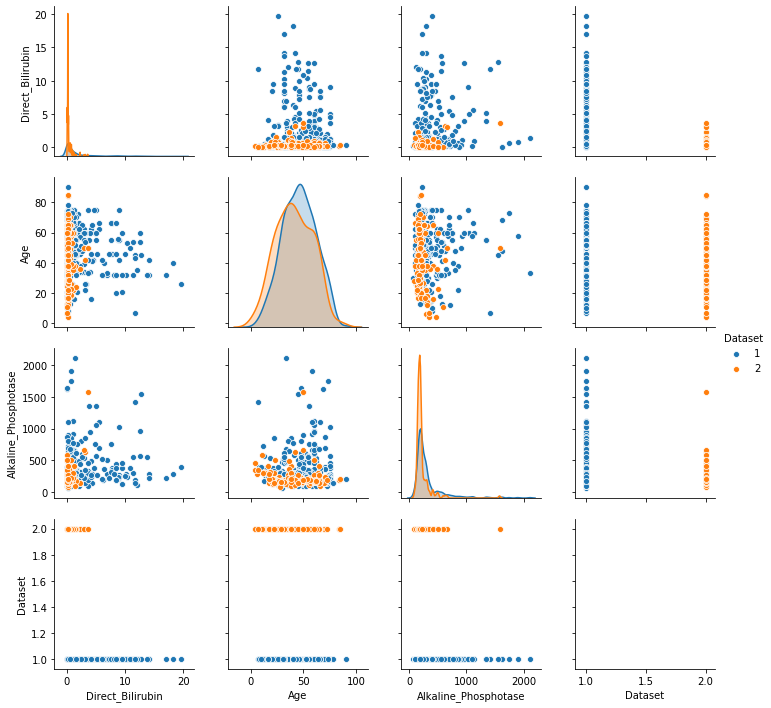

In [62]:
fig = sns.pairplot(data=data[['Direct_Bilirubin', 'Age', 'Alkaline_Phosphotase','Dataset']], hue='Dataset')

Видно, что данные по двум выбранным столбцам сильно перемешаны, просто выявить заболенвание не получится. Однако, если выбрать в качестве второго параметра Alkaline_Phosphotase....

In [63]:
alkaline = data['Alkaline_Phosphotase']
direct = data['Direct_Bilirubin']
dataset = data['Dataset'] - 1
X = np.vstack([np.array(alkaline), np.array(direct)]).T
y = dataset

model = LogisticRegression()
result = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
# model.predict(X)
abs(model.predict(X) - y).sum()/len(y)

0.2849740932642487

... результата тоже не будет. 

In [66]:
dn = data.drop(columns='Gender')
dn['Dataset'] = dn['Dataset'] - 1
dn.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Z_Gender
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [67]:
dn.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Z_Gender'],
      dtype='object')

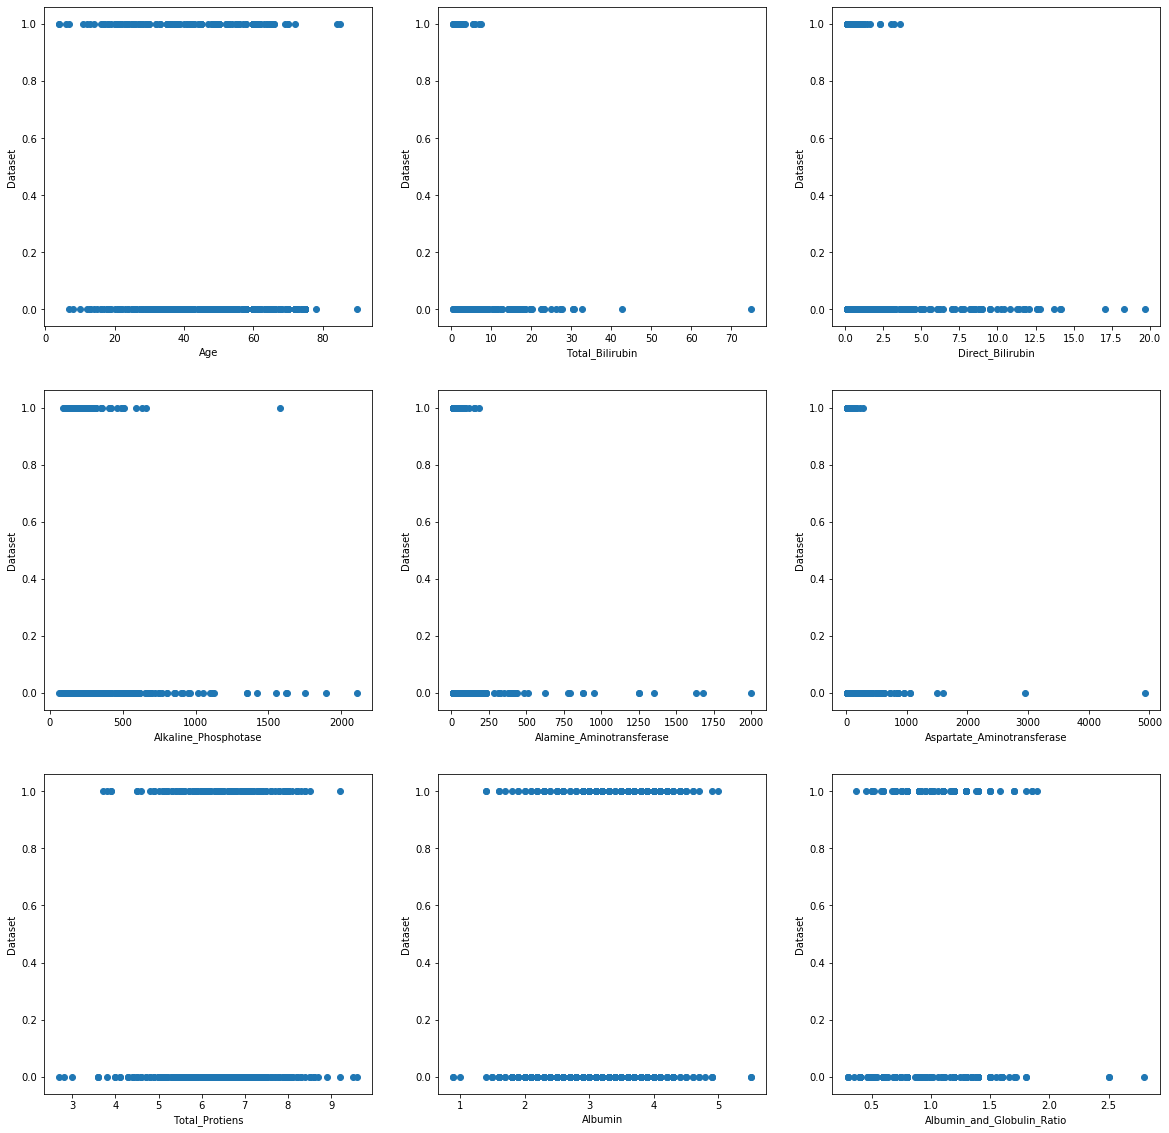

In [68]:

rcParams['figure.figsize'] = 20,20

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.scatter(dn[dn.columns[i]], dn['Dataset'])
    plt.xlabel(dn.columns[i])
    plt.ylabel('Dataset')
    
plt.show()

Видно, что влиять могут параметры 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',

удаляем столбцы 'Age', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'

In [69]:
dn = dn.drop(columns=['Age', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'])

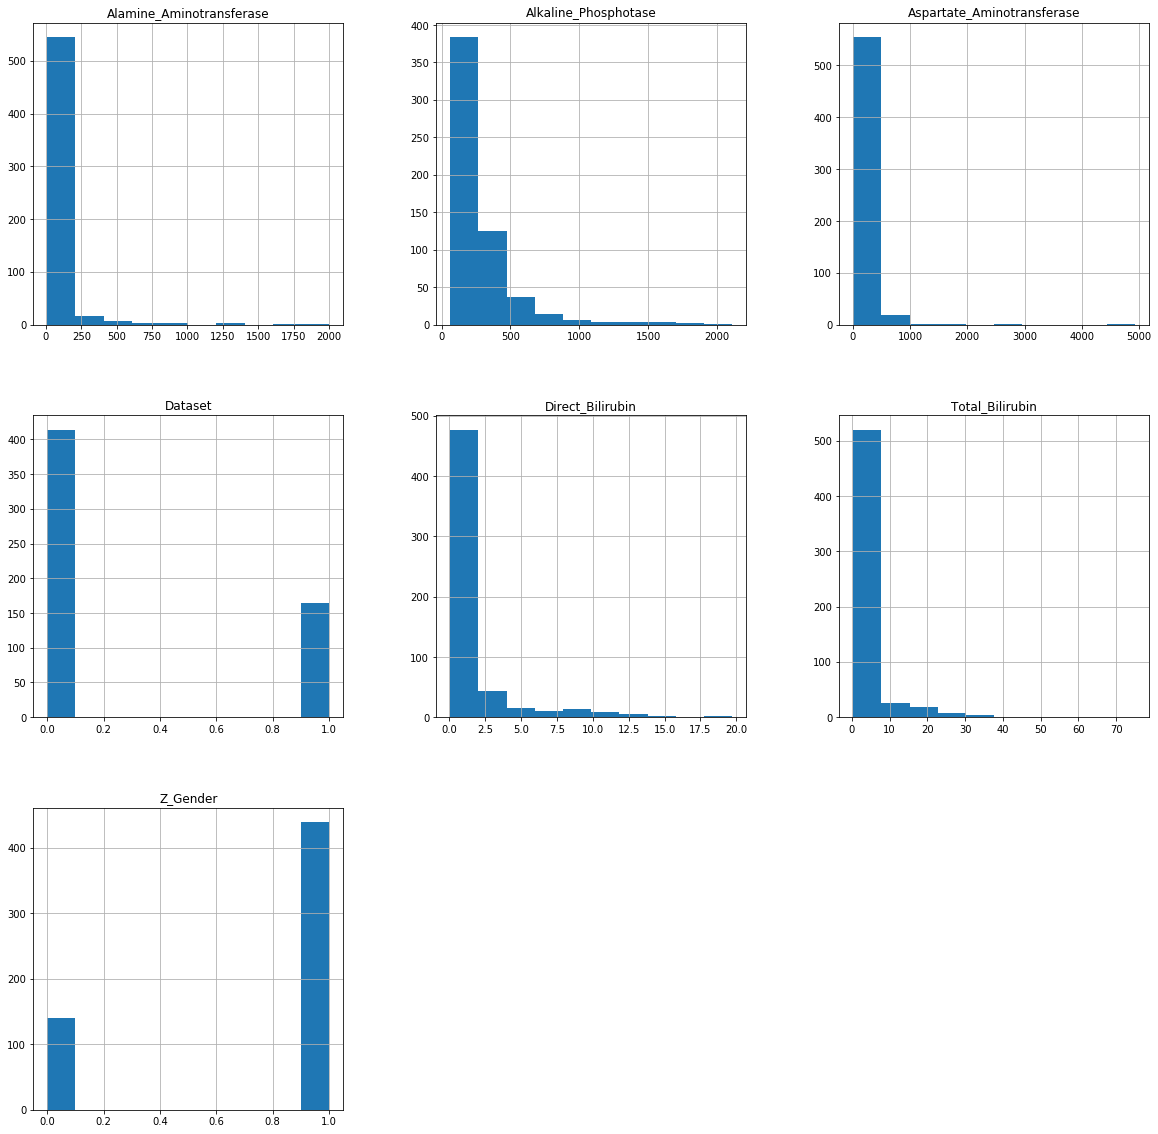

In [70]:
dn.hist()
plt.show()

Normal - 'Total_Protiens', 'Albumin_and_Globulin_Ratio', 'Age', 'Albumin'. 

Lognormal - 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'

tr_list = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
           'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']

for cur in tr_list:
    dn[cur] = np.log2(dn[cur])

dn.hist()
plt.show()

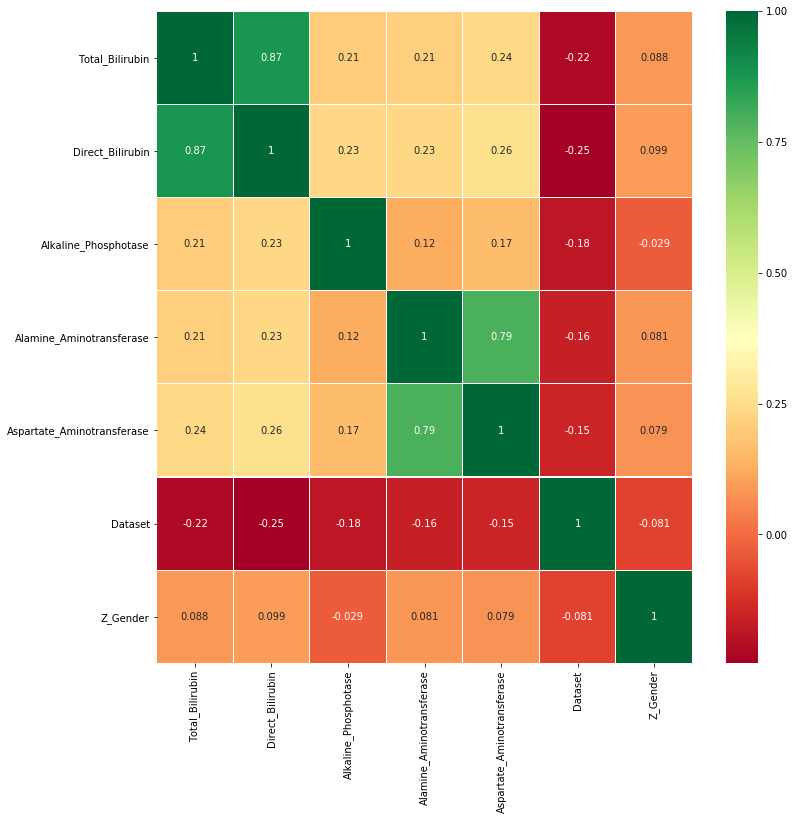

In [71]:
sns.heatmap(dn.corr(), annot=True, linewidths=0.2, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [72]:
#Let's try to make it normal
tr_list = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
           'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']

for cur in tr_list:
    dn[cur] = np.log2(dn[cur])

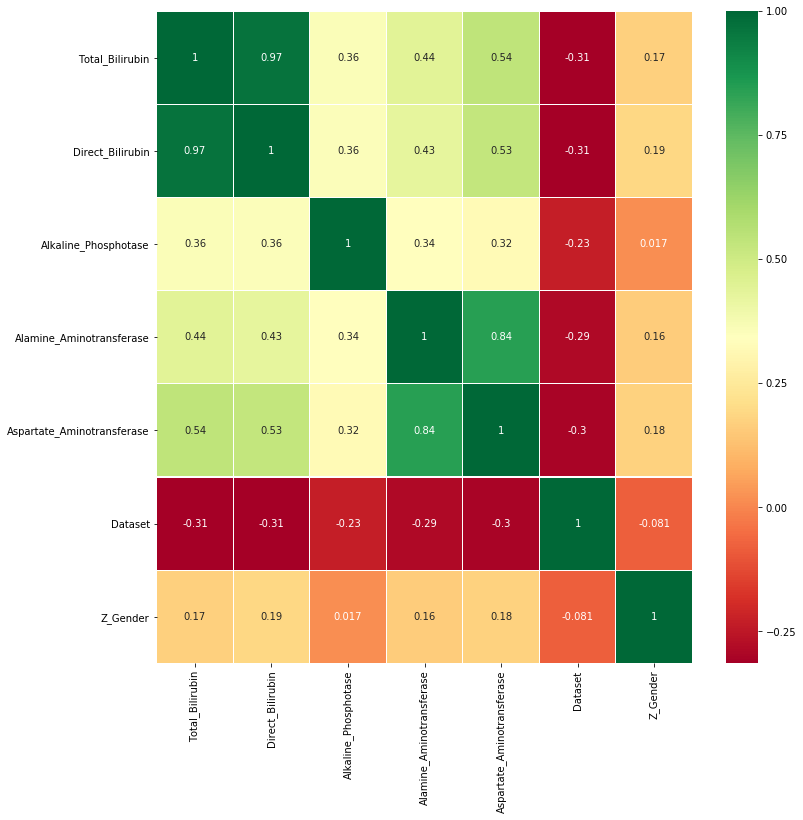

In [73]:
# Матрица корреляции поменялась, но непринципиально
sns.heatmap(dn.corr(), annot=True, linewidths=0.2, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [74]:
#Drop total bilirubin
dn = dn.drop(columns='Total_Bilirubin')

In [75]:
X = np.array(dn.drop(columns='Dataset'))
y = np.array(dn['Dataset'])

model = LogisticRegression()
result = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
#Error count
# abs(model.predict(X) - y).sum()/len(y)
((model.predict(X) ^ y) & y).sum()/165

0.8848484848484849

Такая модель предсказывает чуть хуже (29,7% ошибок против 27% при полном наборе), зато использует 4 столбца таблицы вместо 9. (Позже разобрался - она почти всегда предсказывает ноль. Ниже решение)

In [77]:
dn.columns

Index(['Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Dataset', 'Z_Gender'],
      dtype='object')

In [78]:
#Last try))) Drop 'Aspartate_Aminotransferase'
X = np.array(dn[['Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']])
y = np.array(dn['Dataset'])

model = LogisticRegression()
result = model.fit(X, y)

#Error count
# abs(model.predict(X) - y).sum()/len(y)
((model.predict(X) ^ y) & y).sum()/165

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8666666666666667

In [79]:
X = np.array(dn[['Direct_Bilirubin', 'Alkaline_Phosphotase']])
y = np.array(dn['Dataset'])

model = LogisticRegression()
result = model.fit(X, y)

#Error count
# abs(model.predict(X) - y).sum()/len(y)
#model.predict(X)
# ((model.predict(X) ^ y) & y).sum()
# print(model.predict(X), y)
((model.predict(X) ^ y) & y).sum()/165

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9030303030303031

## Пробуем уменьшить кол-во данных.

 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'

In [97]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data = data.dropna()
data['Dataset'] = data['Dataset']-1
data = data.drop(columns=['Gender'])

In [98]:
data[data['Dataset']==0].quantile([0.25, 0.5, 0.75, 0.9, 1])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,34.0,0.800,0.20,186.00,25.0,29.25,5.70,2.5,0.7,0.0
0.50,46.0,1.400,0.50,229.00,41.0,53.00,6.55,3.0,0.9,0.0
0.75,58.0,3.675,1.80,315.75,77.5,110.25,7.20,3.6,1.1,0.0
0.90,66.7,11.920,6.17,578.50,178.7,249.40,7.90,4.0,1.3,0.0
1.00,90.0,75.000,19.70,2110.00,2000.0,4929.00,9.60,5.5,2.8,0.0


In [99]:
data[data['Dataset']==1].quantile([0.25, 0.5, 0.75, 0.9, 1])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,28.0,0.70,0.2,162.0,20.0,21.0,5.90,2.9,0.9,1.0
0.50,41.0,0.80,0.2,187.0,28.0,29.0,6.60,3.4,1.0,1.0
0.75,55.0,1.10,0.3,215.0,38.0,43.0,7.30,4.0,1.2,1.0
0.90,65.0,1.86,0.8,313.6,59.0,78.8,7.96,4.3,1.4,1.0
1.00,85.0,7.30,3.6,1580.0,181.0,285.0,9.20,5.0,1.9,1.0


Попробуем удалить данные о здоровых людях, которые пересекаются с третьим квартилем больных (Total_Bilirubin <1.1) - примерно 30% записей

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 10 columns):
Age                           579 non-null int64
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       579 non-null int64
dtypes: float64(5), int64(5)
memory usage: 49.8 KB


In [101]:
data = data[ (data['Total_Bilirubin'] > 1.1) | (data['Dataset'] == 1)]

In [111]:
data[data['Dataset']==1].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,41.363636,1.144848,0.396364,220.684848,33.836364,40.763636,6.539394,3.339394,1.029576,1.0
std,17.059112,1.009613,0.521944,141.527805,25.146229,36.563158,1.053316,0.778577,0.287252,0.0
min,4.000000,0.500000,0.100000,90.000000,10.000000,10.000000,3.700000,1.400000,0.370000,1.0
25%,28.000000,0.700000,0.200000,162.000000,20.000000,21.000000,5.900000,2.900000,0.900000,1.0
50%,41.000000,0.800000,0.200000,187.000000,28.000000,29.000000,6.600000,3.400000,1.000000,1.0
75%,55.000000,1.100000,0.300000,215.000000,38.000000,43.000000,7.300000,4.000000,1.200000,1.0
max,85.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,9.200000,5.000000,1.900000,1.0


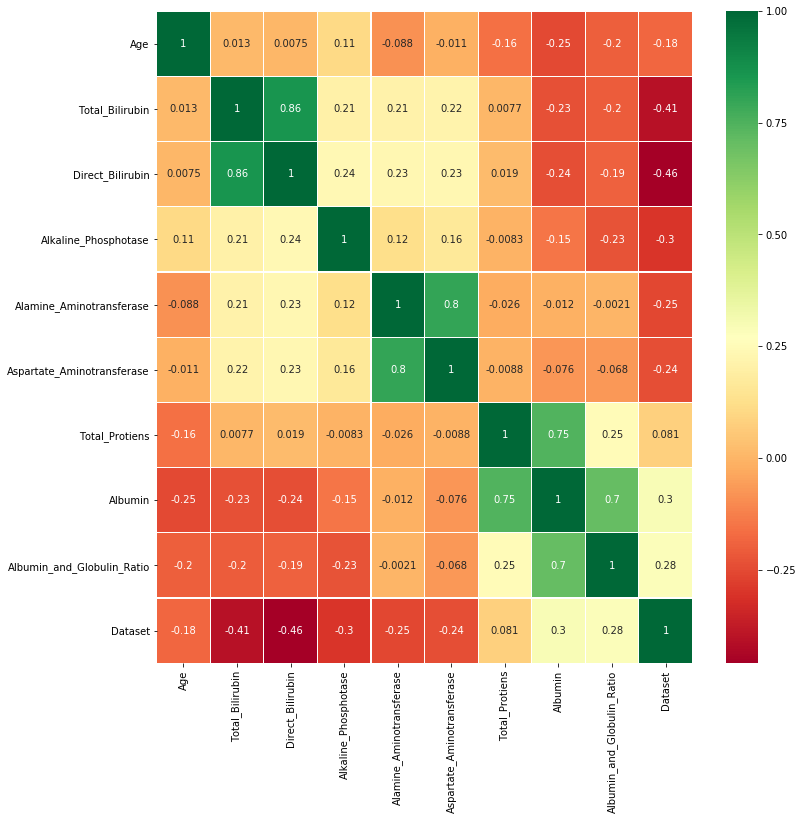

In [110]:
sns.heatmap(data.corr(), annot=True, linewidths=0.2, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Посмотрим, как поведет себя модель. Учитываю комментарий про тренировочный и тестовый наборы :) 

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data['Total_Bilirubin']).reshape(-1, 1), data['Dataset'], test_size=0.2)

In [115]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
((model.predict(X_test) ^ y_test) & y_test).sum()/len(y_test)

0.038461538461538464

Ошибка первого рода составляет всего 3,8%

In [117]:
abs(model.predict(X_test) - y_test).sum()/len(y_test)

0.16666666666666666

А всего мы ошибались в 16.7 % случаев - при этом, предсказываем мы только по одной переменной.

### Посчитать квартили для всех колонок. 

In [118]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,44.772021,4.574093,2.131088,311.264249,94.272021,136.051813,6.440415,3.061917,0.918031,0.427461
std,16.041338,7.311041,3.268054,260.256432,205.253372,346.452991,1.058361,0.806033,0.340338,0.495352
min,4.000000,0.500000,0.100000,90.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.900000,0.200000,180.000000,25.000000,28.250000,5.700000,2.500000,0.700000,0.000000
50%,45.000000,1.800000,0.800000,216.000000,39.000000,50.000000,6.500000,3.000000,0.900000,0.000000
75%,58.000000,4.100000,2.200000,315.750000,66.500000,101.750000,7.200000,3.700000,1.100000,1.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.200000,5.000000,2.800000,1.000000


In [120]:
data[data['Dataset']==1].quantile([0.25, 0.5, 0.75, 0.9, 1])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,28.0,0.70,0.2,162.0,20.0,21.0,5.90,2.9,0.9,1.0
0.50,41.0,0.80,0.2,187.0,28.0,29.0,6.60,3.4,1.0,1.0
0.75,55.0,1.10,0.3,215.0,38.0,43.0,7.30,4.0,1.2,1.0
0.90,65.0,1.86,0.8,313.6,59.0,78.8,7.96,4.3,1.4,1.0
1.00,85.0,7.30,3.6,1580.0,181.0,285.0,9.20,5.0,1.9,1.0


## Часть 2

In [121]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [122]:
ill_young = data[(data['Age'] <= 50) & (data['Dataset'] == 2)]
healthy_young = data[(data['Age'] <= 50) & (data['Dataset'] == 1)]

ill_old = data[(data['Age'] > 50) & (data['Dataset'] == 2)]
healthy_old = data[(data['Age'] > 50) & (data['Dataset'] == 1)]

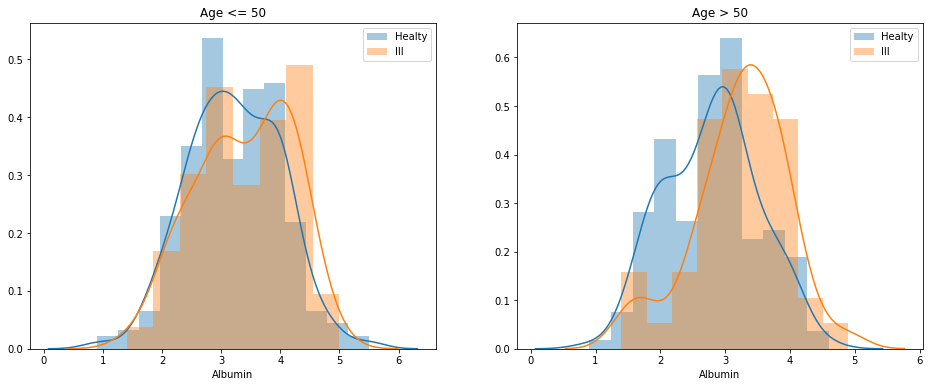

In [123]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,6

plt.subplot(1, 2, 1)
sns.distplot(healthy_young['Albumin'])
sns.distplot(ill_young['Albumin'])
plt.legend(labels=['Healty', 'Ill'])
plt.title('Age <= 50')

plt.subplot(1, 2, 2)
sns.distplot(healthy_old['Albumin'])
sns.distplot(ill_old['Albumin'])
plt.legend(labels=['Healty', 'Ill'])
plt.title('Age > 50')

plt.show()

У людей старше 50 лет наблюдается существенный сдвиг вправо показателя Альбумина

In [124]:
print(f'Young Healthy:\tmean:\t{healthy_young["Albumin"].mean()}\tmedian:\t{healthy_young["Albumin"].median()}')
print(f'Young Ill:\tmean:\t{ill_young["Albumin"].mean()}\tmedian:\t{ill_young["Albumin"].median()}')
print(f'Old Healthy:\tmean:\t{healthy_old["Albumin"].mean()}\tmedian:\t{healthy_old["Albumin"].median()}')
print(f'Old Ill:\tmean:\t{ill_old["Albumin"].mean()}\tmedian:\t{ill_old["Albumin"].median()}')

Young Healthy:	mean:	3.2248062015503876	median:	3.2
Young Ill:	mean:	3.3915254237288117	median:	3.5
Old Healthy:	mean:	2.7924050632911386	median:	2.9
Old Ill:	mean:	3.2306122448979595	median:	3.3


Как я писал выше - у больных наблюдается сдвиг Альбумина в сторону высоких значений. Можно прогнать т-критерий:

In [125]:
stats.ttest_ind(healthy_old["Albumin"], ill_old["Albumin"]) #low p-value - different 

Ttest_indResult(statistic=-3.739331983558448, pvalue=0.0002393779149097756)


### Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [126]:
stats.ttest_1samp( data[data['Dataset']==2]['Total_Bilirubin'], data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012505, pvalue=3.180002804533163e-64)

Ответ: Параметр pvalue практически равен нулю, что говорит о кардинальном различии выборки и генеральной совокупности

### Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [127]:
stats.ttest_ind(data[data['Dataset']==1]['Total_Bilirubin'], data[data['Dataset']==2]['Total_Bilirubin'])

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Ответ: выборки различаются. Я прогнал для разных параметров - для всех из них выборка и генеральная совокупность отличаются

### Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [128]:
data_g1 = data[ data['Age'] <= 30]['Dataset']
data_g2 = data[ (data['Age'] > 30) & (data['Age']<=55)]['Dataset']
data_g3 = data[ data['Age'] > 55]['Dataset']
stats.f_oneway(data_g1, data_g2, data_g3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

Вопросы задавать на почту yustiks@gmail.com